In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

### dataset ->    https://drive.google.com/drive/folders/1tE0LxbzsVX70y8Br_VxiZas288ODDBup

Mounted at /content/drive


In [ ]:
courses = pd.read_csv('/content/courses.csv')
students = pd.read_csv('/content/students.csv')
nov = pd.read_csv('/content/reg-month1.csv')
dec = pd.read_csv('/content/reg-month2.csv')

matches = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

In [ ]:
students.head(3)

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3


In [ ]:
courses

,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499
5,6,power bi,1899
6,7,ms sxcel,1599
7,8,pandas,1099
8,9,plotly,699
9,10,pyspark,2499


In [ ]:
print(nov.shape,dec.shape)

(25, 2) (28, 2)


In [ ]:
### pd.concat

nov_dec=pd.concat([nov,dec],ignore_index=True)
print(nov_dec.shape)
nov_dec

(53, 2)


,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [ ]:
multi_index_df=pd.concat([nov,dec],keys=["nov","dec"])
multi_index_df

student_id  course_id
nov 0           23          1
    1           15          5
    2           18          6
    3           23          4
    4           16          9
    5           18          1
    6            1          1
    7            7          8
    8           22          3
    9           15          1
    10          19          4
    11           1          6
    12           7         10
    13          11          7
    14          13          3
    15          24          4
    16          21          1
    17          16          5
    18          23          3
    19          17          7
    20          23          6
    21          25          1
    22          19          2
    23          25         10
    24           3          3
dec 0            3          5
    1           16          7
    2           12         10
    3           12          1
    4           14          9
    5            7          7
    6            7          2
    7           16          3
    8           17         10
    9           11          8
    10          14          6
    11          12          5
    12          12          7
    13          18          8
    14           1         10
    15           1          9
    16           2          5
    17           7          6
    18          22          5
    19          22          6
    20          23          9
    21          23          5
    22          14          4
    23          14          1
    24          11         10
    25          42          9
    26          50          8
    27          38          1

In [ ]:
multi_index_df.loc["nov"]

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [ ]:
multi_index_df.loc[("dec",9)]

,dec
,9
student_id,11
course_id,8


In [ ]:
pd.concat([nov,dec],axis=1)   ## axis=1 -> horizontally concat

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


## Merging in pandas

In [ ]:
### innner join
nov_dec=pd.concat([nov,dec],ignore_index=True)
 ## left table -> student , right table -> nov_dec
students.merge(nov_dec,how="inner",on="student_id")  ### common column student_id

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [ ]:
### left join
courses.merge(nov_dec,how="left",on="course_id")
 ## left table -> courses , right table -> nov_dec

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


In [ ]:
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})
students=pd.concat([students,temp_df],ignore_index=True)
students.shape

(28, 3)

In [ ]:
### right join
nov_dec.merge(students,how="right",on="student_id")

,student_id,course_id,name,partner
0,1,1.0,Kailash Harjo,23
1,1,6.0,Kailash Harjo,23
2,1,10.0,Kailash Harjo,23
3,1,9.0,Kailash Harjo,23
4,2,5.0,Esha Butala,1
5,3,3.0,Parveen Bhalla,3
6,3,5.0,Parveen Bhalla,3
7,4,NaN,Marlo Dugal,14
8,5,NaN,Kusum Bahri,6
9,6,NaN,Lakshmi Contractor,10


In [ ]:
students.merge(nov_dec,how="right",on="student_id")

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [ ]:
## outer join -> Full join
students.merge(nov_dec,how="outer",on="student_id").tail(10)

,student_id,name,partner,course_id
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,26,Nitish,28.0,NaN
58,27,Ankit,26.0,NaN
59,28,Rahul,17.0,NaN
60,38,NaN,NaN,1.0
61,42,NaN,NaN,9.0
62,50,NaN,NaN,8.0


In [ ]:
### practic question

nov_dec=pd.concat([nov,dec],ignore_index=True)
courses.merge(nov_dec,how="inner",on="course_id")["price"].sum()  ## total revenue

np.int64(154247)

In [ ]:
## month by month revenue
nov_revenue=courses.merge(nov,how="inner",on="course_id")["price"].sum()
dec_revenue=courses.merge(dec,how="inner",on="course_id")["price"].sum()
print(nov_revenue,dec_revenue)
 ## or
nov_dec=pd.concat([nov,dec],keys=["nov","dec"]).reset_index()
nov_dec.merge(courses,how="inner",on="course_id").groupby("level_0")["price"].sum()

89175 65072


,price
level_0,
dec,65072
nov,89175


In [ ]:
## registration table
nov_dec=pd.concat([nov,dec],ignore_index=True)
students.merge(nov_dec,on="student_id").merge(courses,on="course_id")[["name","course_name","price"]]

,name,course_name,price
0,Kailash Harjo,python,2499
1,Kailash Harjo,power bi,1899
2,Kailash Harjo,pyspark,2499
3,Kailash Harjo,plotly,699
4,Esha Butala,tableau,2499
5,Parveen Bhalla,data analysis,4999
6,Parveen Bhalla,tableau,2499
7,Tarun Thaker,pandas,1099
8,Tarun Thaker,pyspark,2499
9,Tarun Thaker,ms sxcel,1599


In [ ]:
nov_dec=pd.concat([nov,dec],ignore_index=True)
revenue_from_every_courses=nov_dec.merge(courses,on="course_id").groupby("course_name")['price'].sum()
revenue_from_every_courses

,price
course_name,
data analysis,24995
machine learning,39996
ms sxcel,7995
pandas,4396
plotly,3495
power bi,11394
pyspark,14994
python,22491
sql,6998


<Axes: xlabel='course_name'>

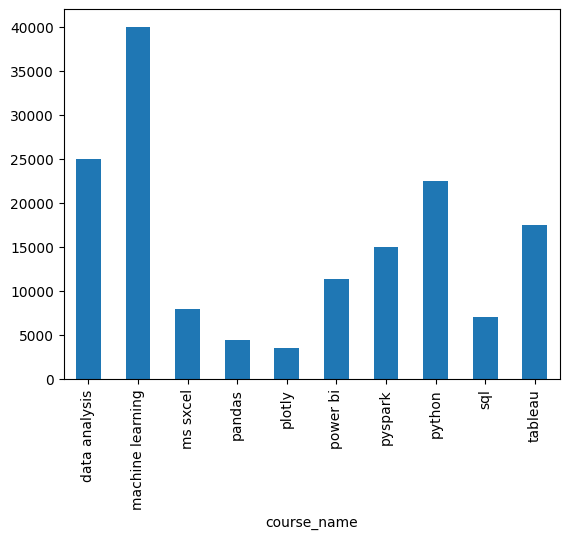

In [ ]:
revenue_from_every_courses.plot(kind="bar")

<Axes: ylabel='price'>

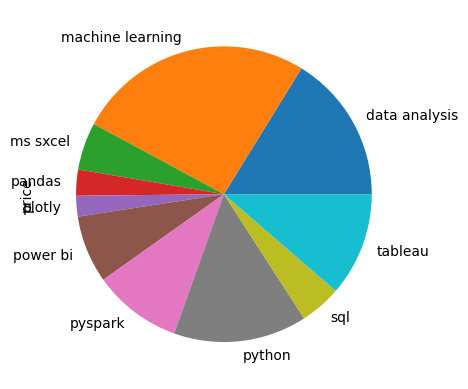

In [ ]:
revenue_from_every_courses.plot(kind="pie")

In [ ]:
## common studens

common_student_id=np.intersect1d(nov["student_id"],dec["student_id"])
students[students["student_id"].isin(common_student_id)]["name"]
## or
common_student_id=nov.merge(dec,on="student_id")["student_id"].unique()
students[students["student_id"].isin(common_student_id)]["name"]

,name
0,Kailash Harjo
2,Parveen Bhalla
6,Tarun Thaker
10,David Mukhopadhyay
15,Elias Dodiya
16,Yasmin Palan
17,Fardeen Mahabir
21,Yash Sethi
22,Chhavi Lachman


In [ ]:
## not endrolled courses

# numpy.intersect1d(arr1, arr2) → returns the sorted array of unique values that are present in both arr1 and arr2.

course_ids=np.setdiff1d(courses["course_id"],nov_dec["course_id"])
courses[courses["course_id"].isin(course_ids)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [ ]:
 ## students not endroll any courses
 student_ids=np.setdiff1d(students["student_id"],nov_dec["student_id"])

 students[students["student_id"].isin(student_ids)]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


In [ ]:
## self join  both table ar same table
students.merge(students,how="inner",left_on="partner",right_on="student_id")[["name_x","name_y"]]



,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


In [ ]:
## top three students -> cources buy
nov_dec.merge(students,on="student_id").groupby(["student_id","name"])["course_id"].count().sort_values(ascending=False).head(3)

,,course_id
student_id,name,
23,Chhavi Lachman,6
7,Tarun Thaker,5
14,Pranab Natarajan,4


In [ ]:
## top three students -> high total cost for buy cource
nov_dec.merge(students,on="student_id").merge(courses,on="course_id").groupby(["student_id","name"])["price"].sum().sort_values(ascending=False).head(3)

,,price
student_id,name,
23,Chhavi Lachman,22594
14,Pranab Natarajan,15096
19,Qabeel Raman,13498


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

matches = pd.read_csv('/content/matches.csv')
delivery = pd.read_csv('/content/deliveries.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [6]:
delivery.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [28]:
df=delivery.merge(matches,left_on="match_id",right_on="id")
total_sixs_each_venue = df[df["batsman_runs"]==6].groupby("venue")["venue"].count()
total_sixs_each_venue

,venue
venue,
Barabati Stadium,68
Brabourne Stadium,114
Buffalo Park,27
De Beers Diamond Oval,34
Dr DY Patil Sports Academy,173
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,129
Dubai International Cricket Stadium,58
Eden Gardens,594
Feroz Shah Kotla,636


In [31]:
total_matches_each_venue = df.groupby('venue')["match_id"].unique().apply(lambda x:len(x))
total_matches_each_venue

pandas.core.series.Series

venue
Holkar Cricket Stadium                                  17.600000
M Chinnaswamy Stadium                                   13.227273
Sharjah Cricket Stadium                                 12.666667
Himachal Pradesh Cricket Association Stadium            12.000000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11.727273
Wankhede Stadium                                        11.526316
De Beers Diamond Oval                                   11.333333
Maharashtra Cricket Association Stadium                 11.266667
JSCA International Stadium Complex                      10.857143
Sardar Patel Stadium, Motera                            10.833333
Feroz Shah Kotla                                        10.600000
MA Chidambaram Stadium, Chepauk                         10.562500
Saurashtra Cricket Association Stadium                  10.400000
Brabourne Stadium                                       10.363636
Dr DY Patil Sports Academy                              10.176471
Raji

<Axes: xlabel='venue'>

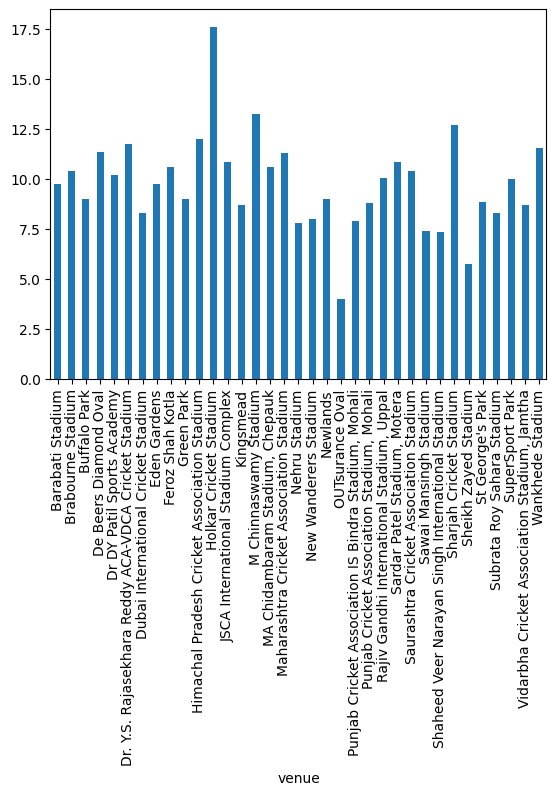

In [34]:
### sixe per matches
print((total_sixs_each_venue/total_matches_each_venue).sort_values(ascending=False))
(total_sixs_each_venue/total_matches_each_venue).plot(kind="bar")

In [44]:
## top run by batsman in season
df=delivery.merge(matches,left_on="match_id",right_on="id")
df.groupby(["season","batsman"])["batsman_runs"].sum().reset_index().sort_values("batsman_runs",ascending=False).drop_duplicates(subset=["season"],keep="first").sort_values("season")


,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
